# Exercício - Previsão de Vendas

Nosso objetivo é criar um modelo de previsão
de vendas a partir do histórico de vendas e
investimento em marketing (em TV, Jornal e Rádio) de uma empresa ficticia.

In [3]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importar o arquivo
df = pd.read_csv("advertising.csv")

# ver as primeiras entradas
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


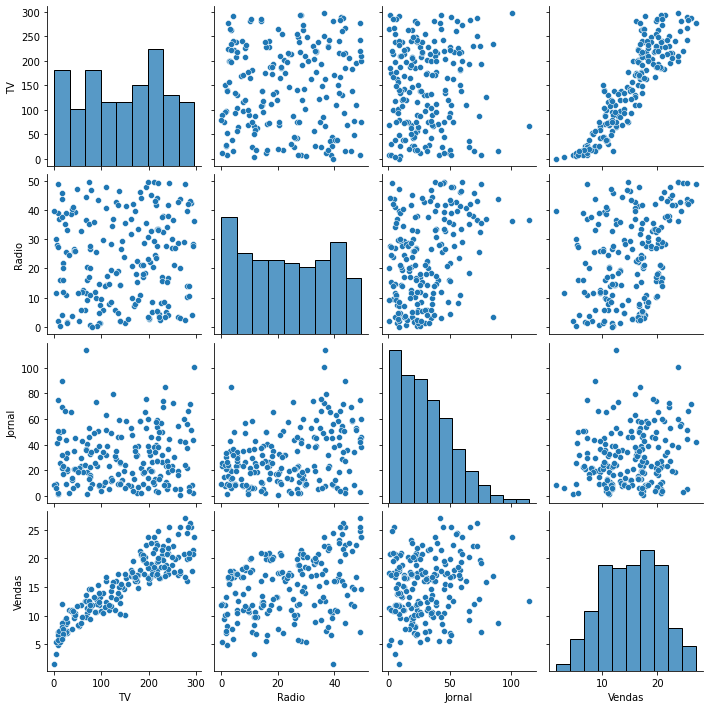

In [6]:
sns.pairplot(df)
plt.show()

No gráfico TV X VENDAS, podemos perceber
que existe uma proporcionalidade no
investimento e o aumento das vendas.

Já no gráfico RADIO X VENDAS, essa
proporcionalidade não é clara. Na verdade, não
é muito obvia a relação entre elas.

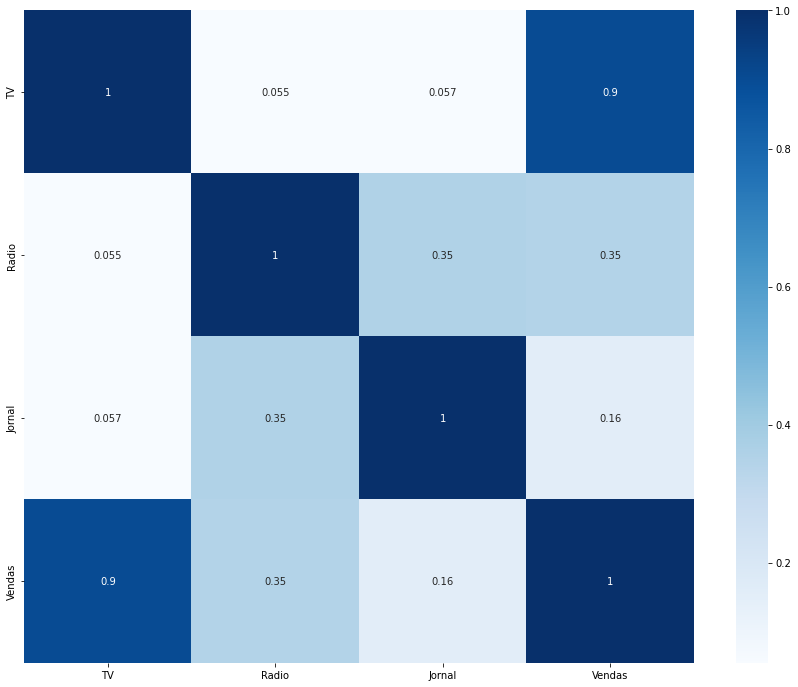

In [9]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(df.corr(), cmap='Blues', annot=True)


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Vendas', axis=1)
y = df.Vendas

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import numpy as np

In [14]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

RandomForestRegressor()

#### Teste e Avaliação dos Modelos

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [17]:
test_LR = model_LR.predict(X_test)
test_RFR = model_RFR.predict(X_test)

In [19]:
r2_LR = metrics.r2_score(y_test, test_LR)
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, test_LR))
print(r2_LR, rmse_LR)

0.9071151423684272 1.539694765603124


In [20]:
r2_RFR = metrics.r2_score(y_test, test_RFR)
rmse_RFR = np.sqrt(metrics.mean_squared_error(y_test, test_RFR))
print(r2_RFR, rmse_RFR)

0.966947106939349 0.9184740968947721


#### Visualização Gráfica das Previsões

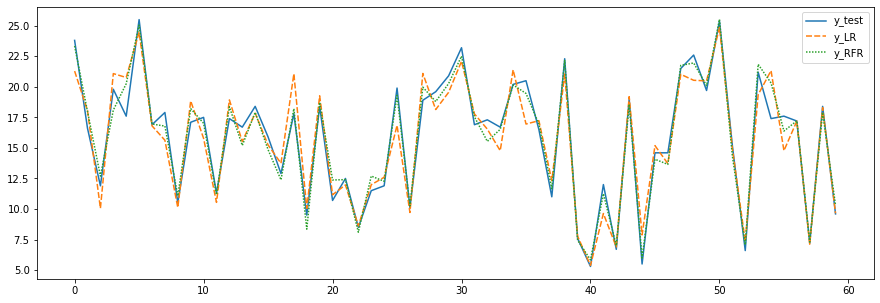

In [23]:
df_resultado = pd.DataFrame()

df_resultado['y_test'] = y_test
df_resultado['y_LR'] = test_LR
df_resultado['y_RFR'] = test_RFR
df_resultado = df_resultado.reset_index(drop=True)

fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()

In [24]:
display(df_resultado)

,y_test,y_LR,y_RFR
0,23.8,21.288161,23.342
1,16.6,18.042132,17.977
2,11.9,10.059590,12.693
3,19.8,21.082241,18.096
4,17.6,20.764760,20.257
5,25.5,24.471874,25.046
6,16.9,16.806436,16.958
7,17.9,15.628857,16.787
8,10.5,10.124799,11.082
9,17.1,18.846019,18.219


#### Qual a importância de cada variável para as vendas?

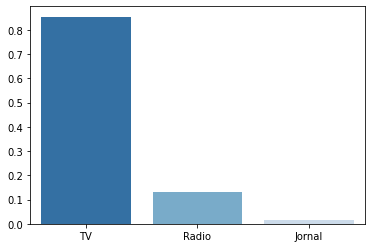

In [33]:
sns.barplot(x=X_train.columns, y=model_RFR.feature_importances_, palette="Blues_r")
plt.show()

In [28]:
features = pd.DataFrame(model_RFR.feature_importances_, X_train.columns)
features

,0
TV,0.854080
Radio,0.129338
Jornal,0.016582


#### Será que estamos investindo certo?

In [31]:
df[["TV", "Radio", "Jornal"]].sum()

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64